<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/Outlier_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_housing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ClassFiles/datesets/HousingPricesData.csv')
df_housing.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [3]:
#Descriptive Statistics
print(df_housing.describe())

              Price        Area        Room         Lon         Lat
count  9.200000e+02  924.000000  924.000000  924.000000  924.000000
mean   6.220654e+05   95.952381    3.571429    4.888605   52.363326
std    5.389942e+05   57.447436    1.592332    0.053140    0.024028
min    1.750000e+05   21.000000    1.000000    4.644819   52.291519
25%    3.500000e+05   60.750000    3.000000    4.855834   52.352077
50%    4.670000e+05   83.000000    3.000000    4.886818   52.364631
75%    7.000000e+05  113.000000    4.000000    4.922337   52.377598
max    5.950000e+06  623.000000   14.000000    5.029122   52.423805


In [4]:
#print(df_housing['Room'].std()) #esta es una solo columna asi que es un solo []
#print(df_housing.std()) # sin escoger columnas
print(df_housing[['Price','Area','Room']].std()) # utiliza [] despues de df para escojer las columas que quieres ver su resultado. si son dos a mas columnas utiliza [[]]

Price    538994.175364
Area         57.447436
Room          1.592332
dtype: float64


In [5]:
atipicos = df_housing[(np.abs(df_housing[['Price','Area','Room']])>(3*df_housing[['Price','Area','Room']].std())).any(axis=1)]
print('\nValores atípicos por columna ')
print(atipicos[['Price','Area','Room']])


Valores atípicos por columna 
         Price  Area  Room
3     580000.0   128     6
4     720000.0   138     5
15    475000.0   105     5
16    700000.0   102     6
20   1625000.0   199     6
..         ...   ...   ...
902  1300000.0   139     5
906  1250000.0   180     9
910  1698000.0   205     5
914   849000.0   111     5
917  1500000.0   194     9

[192 rows x 3 columns]


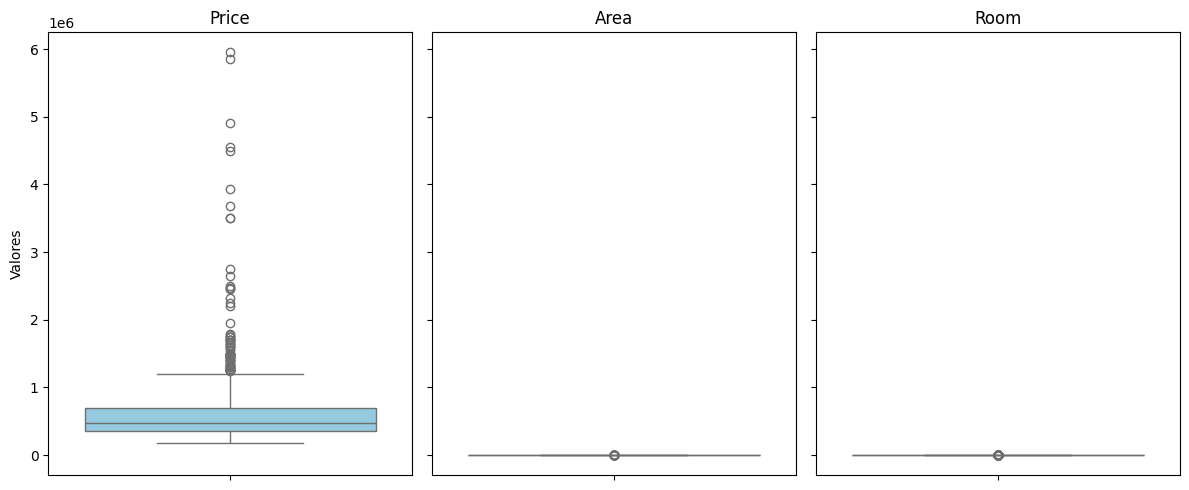

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_housing_mod = df_housing.drop(columns=['Address','Zip','Lon', 'Lat'])

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(df_housing_mod.columns), figsize=(12, 5), sharey=True)

# Dibujar un diagrama de caja para cada columna
for i, col in enumerate(df_housing_mod.columns):
    sns.boxplot(y=df_housing_mod[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Etiqueta común para el eje Y
axes[0].set_ylabel("Valores")

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

In [7]:
import plotly.express as px
import plotly.graph_objects as go

# Crear una figura interactiva con boxplots usando Plotly
fig = go.Figure()

# Agregar un diagrama de caja para cada columna
for col in df_housing_mod.columns:
    fig.add_trace(go.Box(y=df_housing_mod[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8))

# Configurar el diseño
fig.update_layout(
    title="Diagramas de Caja Interactivos",
    yaxis_title="Valores",
    showlegend=False
)

# Mostrar la figura interactiva
fig.show()

In [8]:
# Función para detectar outliers con Rango Intercuartílico (IQR) en varias columnas
def detectar_outliers_iqr(dftemp):
    outliers_dict = {}  # Diccionario para almacenar outliers por columna

    for col in dftemp.select_dtypes(include=['number']).columns:  # Solo columnas numéricas
        Q1 = dftemp[col].quantile(0.25)
        Q3 = dftemp[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtrar outliers
        outliers = dftemp[(dftemp[col] < limite_inf) | (dftemp[col] > limite_sup)]
        outliers_dict[col] = outliers[col].values  # Guardar los valores de los outliers

    return outliers_dict

# Aplicar la función a un DataFrame de ejemplo
outliers_detectados = detectar_outliers_iqr(df_housing_mod)

# Mostrar los outliers detectados
for col, outliers in outliers_detectados.items():
    print(f"Outliers en {col}: {outliers}")


Outliers en Price: [1625000. 1650000. 1950000. 3925000. 1295000. 1475000. 4550000. 1700000.
 1300000. 1750000. 1450000. 1500000. 4495000. 2475000. 1295000. 5950000.
 1450000. 1550000. 1250000. 1500000. 1499000. 1275000. 1595000. 2450000.
 1795000. 2200000. 1495000. 2250000. 1350000. 1650000. 2750000. 1750000.
 3500000. 1700000. 2325000. 1495000. 1375000. 1250000. 2475000. 1425000.
 1695000. 2500000. 2650000. 3680000. 1400000. 4900000. 1695000. 1395000.
 1249000. 1599000. 3500000. 1250000. 1450000. 1400000. 1320000. 1750000.
 1250000. 1775000. 1325000. 1250000. 1625000. 1575000. 1325000. 5850000.
 1450000. 1250000. 1450000. 1300000. 1250000. 1698000. 1500000.]
Outliers en Area: [199 235 258 319 220 497 230 194 394 255 245 199 259 258 198 207 214 250
 232 309 216 246 374 203 257 202 387 374 213 623 467 258 366 226 348 231
 230 212 202 221 257 204 220 480 273 205 194]
Outliers en Room: [ 6  6  6  7  7  6  1 13  6  7  6  8  6  7  8  6  9 10  7  7  8  1  6  1
  8  6  1  6  7  8  9  8  7  8 

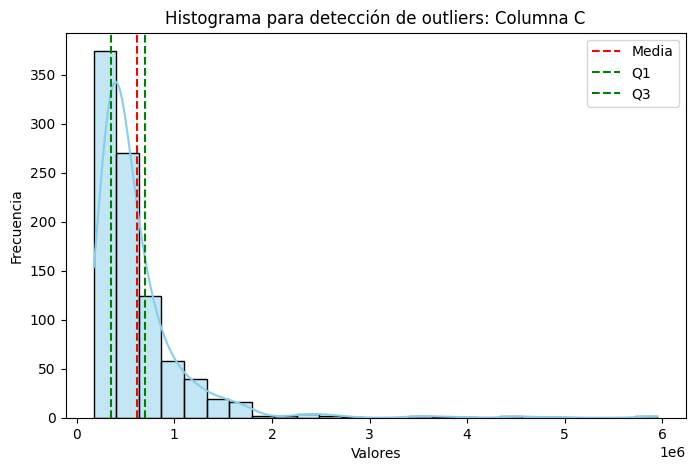

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(df_housing_mod['Price'], bins=25, kde=True, color='skyblue')

#Agregar líneas de referencia para media y cuartiles
plt.axvline(df_housing_mod['Price'].mean(), color='red', linestyle='dashed', label='Media')
plt.axvline(df_housing_mod['Price'].quantile(0.25), color='green', linestyle='dashed', label='Q1')
plt.axvline(df_housing_mod['Price'].quantile(0.75), color='green', linestyle='dashed', label='Q3')

plt.title("Histograma para detección de outliers: Columna C")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


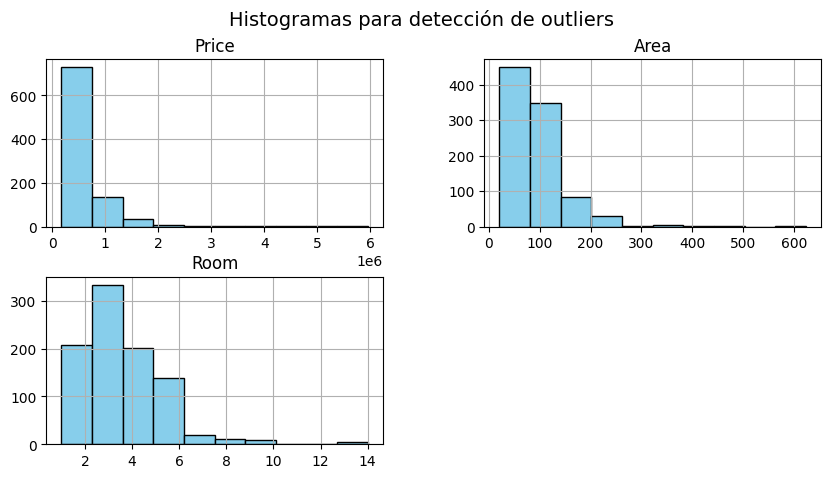

In [10]:
# Crear histogramas para todas las columnas numéricas
df_housing_mod.hist(figsize=(10, 5), bins=10, edgecolor='black', color='skyblue')

# Mostrar gráfico
plt.suptitle("Histogramas para detección de outliers", fontsize=14)
plt.show()

In [11]:
import pandas as pd
import numpy as np

from scipy.stats import zscore

df_housing_mod['Z-ScoreA'] = zscore(df_housing_mod['Price'])
df_housing_mod['Z-ScoreB'] = zscore(df_housing_mod['Area'])
df_housing_mod['Z-ScoreC'] = zscore(df_housing_mod['Room'])
print(df_housing_mod.head(3))

# Definir umbral (generalmente 3)
threshold = 3

# Identificar valores atípicos
outliersA = df_housing_mod[np.abs(df_housing_mod['Z-ScoreA']) > threshold]

print("\nValores atípicos detectados:")
print(outliersA)

      Price  Area  Room  Z-ScoreA  Z-ScoreB  Z-ScoreC
0  685000.0    64     3       NaN -0.556503 -0.359057
1  475000.0    60     3       NaN -0.626170 -0.359057
2  850000.0   109     4       NaN  0.227246  0.269293

Valores atípicos detectados:
Empty DataFrame
Columns: [Price, Area, Room, Z-ScoreA, Z-ScoreB, Z-ScoreC]
Index: []



Resumen estadístico en la Columna Area antes de la Eliminación :
count    924.000000
mean      95.952381
std       57.447436
min       21.000000
25%       60.750000
50%       83.000000
75%      113.000000
max      623.000000
Name: Area, dtype: float64

Resumen estadístico en la Columna Area después de la Eliminación :
count    877.000000
mean      86.429875
std       34.934756
min       21.000000
25%       59.000000
50%       81.000000
75%      107.000000
max      191.000000
Name: Area, dtype: float64


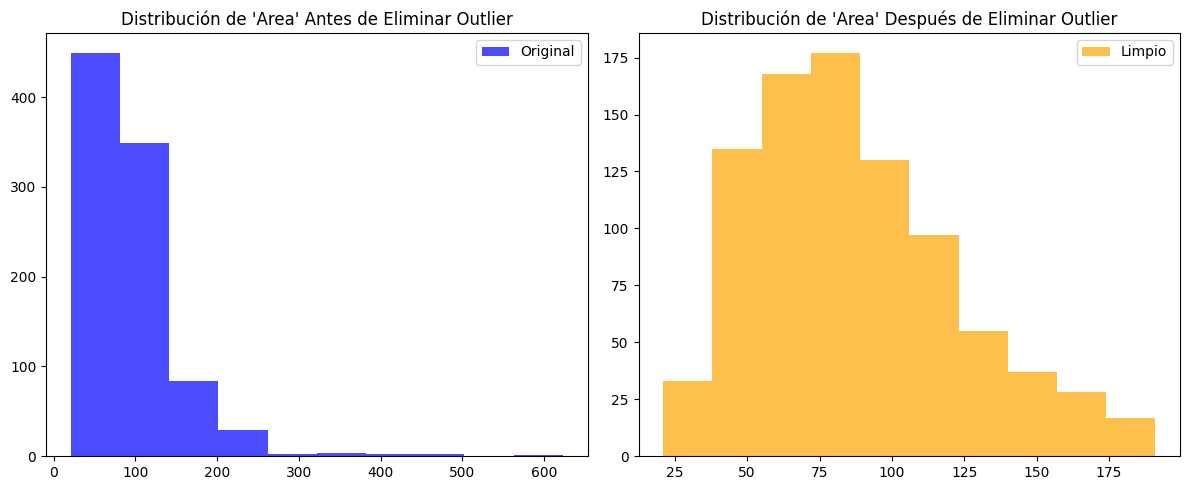

Text(0.5, 1.0, 'Limpia')

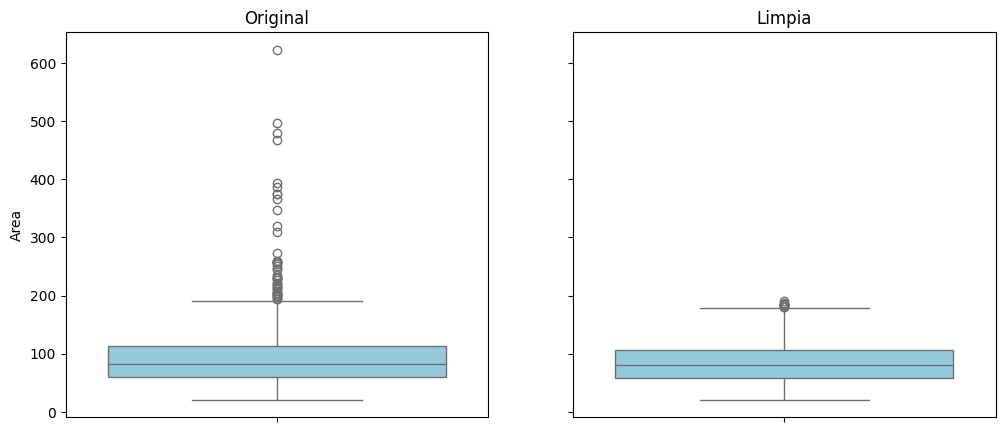

In [12]:
#imprimir las estadísticas del conjunto original
print("\nResumen estadístico en la Columna Area antes de la Eliminación :")
print(df_housing_mod['Area'].describe())

# Identificación por medio del método IQR
Q1 = df_housing_mod['Area'].quantile(0.25)
Q3 = df_housing_mod['Area'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

#Obtiene un conjunto
rd_no_outliers = df_housing_mod[(df_housing_mod['Area'] >= lower_bound) & (df_housing_mod['Area'] <= upper_bound)].copy()

# Imprime el resumen estadísticos después de eliminar los outliers
print("\nResumen estadístico en la Columna Area después de la Eliminación :")
print(rd_no_outliers['Area'].describe())

# Plot the distributions after outlier handling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribución de 'Area' Antes de Eliminar Outlier")
plt.hist(df_housing_mod['Area'], bins=10, color='blue', alpha=0.7, label='Original')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribución de 'Area' Después de Eliminar Outlier")
plt.hist(rd_no_outliers['Area'], bins=10, color='orange', alpha=0.7, label='Limpio')
plt.legend()

plt.tight_layout()
plt.show()



# Diagrama de Cajas antes y después



fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(y=df_housing_mod['Area'], ax=axes[0], color='skyblue')
axes[0].set_title('Original')

sns.boxplot(y=rd_no_outliers['Area'], ax=axes[1], color='skyblue')
axes[1].set_title('Limpia')

Original Dataset Statistics:
              Price        Area        Room  Z-ScoreA      Z-ScoreB  \
count  9.200000e+02  924.000000  924.000000       0.0  9.240000e+02   
mean   6.220654e+05   95.952381    3.571429       NaN  4.613914e-17   
std    5.389942e+05   57.447436    1.592332       NaN  1.000542e+00   
min    1.750000e+05   21.000000    1.000000       NaN -1.305419e+00   
25%    3.500000e+05   60.750000    3.000000       NaN -6.131074e-01   
50%    4.670000e+05   83.000000    3.000000       NaN -2.255870e-01   
75%    7.000000e+05  113.000000    4.000000       NaN  2.969123e-01   
max    5.950000e+06  623.000000   14.000000       NaN  9.179401e+00   

           Z-ScoreC  
count  9.240000e+02  
mean  -1.307276e-16  
std    1.000542e+00  
min   -1.615757e+00  
25%   -3.590571e-01  
50%   -3.590571e-01  
75%    2.692928e-01  
max    6.552792e+00  

Trimmed Dataset Statistics:
              Price        Area        Room  Z-ScoreA    Z-ScoreB    Z-ScoreC
count  7.390000e+02  742.0

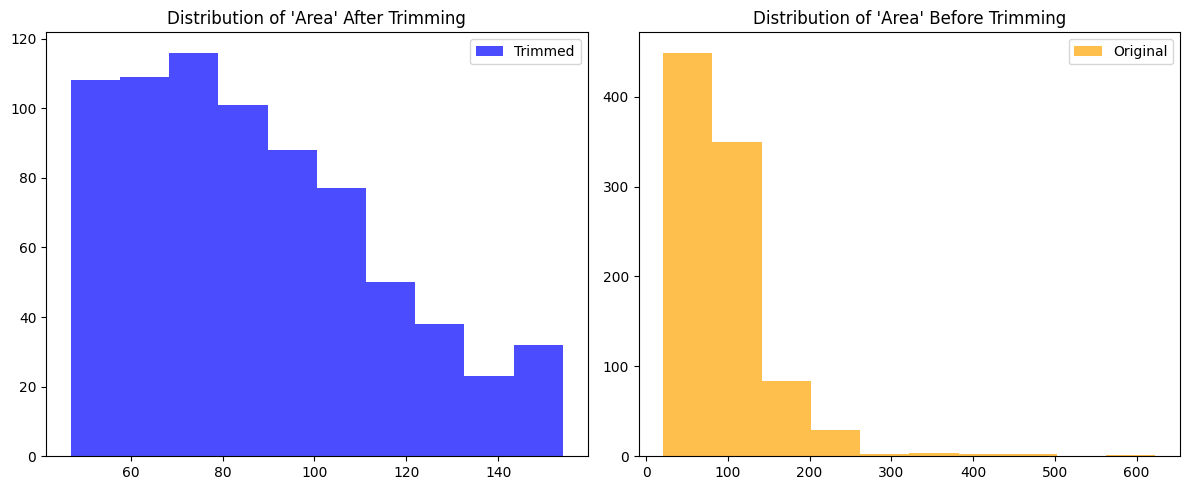

In [13]:
 # Display the original dataset statistics
print("Original Dataset Statistics:")
print(df_housing_mod.describe())

 # Eliminar el 10% de cada lado de la distribución de la columna B
df_trimmed = df_housing_mod[(df_housing_mod['Area'] >= df_housing_mod['Area'].quantile(0.1)) & (df_housing_mod['Area'] <= df_housing_mod['Area'].quantile(0.9))]

# Calculate trimmed mean for each column
df_trimmed_mean = df_trimmed.mean()

# Display the trimmed dataset statistics
print("\nTrimmed Dataset Statistics:")
print(df_trimmed.describe())

# Display the trimmed mean for each column
print("\nTrimmed Mean:")
print(df_trimmed_mean)

# Plot the distributions after trimming
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Area' After Trimming")
plt.hist(df_trimmed['Area'], bins=10, color='blue', alpha=0.7, label='Trimmed')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Area' Before Trimming")
plt.hist(df_housing_mod['Area'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(data, limits=(lower_limit, upper_limit))

NameError: name 'data' is not defined

In [ ]:
from scipy.stats.mstats import winsorize

# Display the original dataset statistics
print("Original Dataset Statistics Column Area:")
print(df_housing_mod['Area'].describe())

# Identify and handle outliers using winsorizing for 'Age' column
winsorizing_fraction = 0.1
df_housing_mod['B_Winsorized'] = winsorize(df_housing_mod['Area'], limits=[winsorizing_fraction, winsorizing_fraction])

# Display the dataset statistics after winsorizing
print("\nDataset Statistics after Winsorizing Column Area:")
print(df_housing_mod['B_Winsorized'].describe())


# Plot the distributions after Winsorizing
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Distribution of 'Area' After Winsorizing")
plt.hist(df_housing_mod['B_Winsorized'], bins=10, color='blue', alpha=0.7, label='Winsorizing')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Distribution of 'Area' Before Winsorizing")
plt.hist(df_housing_mod['Area'], bins=10, color='orange', alpha=0.7, label='Original')
plt.legend()

plt.tight_layout()
plt.show()
